<a href="https://colab.research.google.com/github/Venkat3103/Fetch_Rewards_Data_Analytics_Internship/blob/main/Exercise3_Fetch_Rewards_Data_Analytics_Take_Home_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Venkatasubramanian Narasimman - MS in Information Management at UIUC

# Fetch Rewards Data Analytics Internship - Exercise 3 - Communicating to non technical stakeholders

Contents: EDA, Data quality, Formatting, and a Case Study on Starbucks.

##Importing datasets

In [155]:
import pandas as pd

In [156]:
brands = pd.read_csv("/content/brands.csv")
receipt_items = pd.read_csv("/content/receipt_items.csv")
receipts = pd.read_csv("/content/receipts.csv")
users = pd.read_csv("/content/users.csv")

##Exploratory Data Analysis
Understanding data formats to check and improve data quality

In [157]:
brands.head(5)

,ID,BARCODE,BRAND_CODE,CPG_ID,CATEGORY,CATEGORY_CODE,NAME,ROMANCE_TEXT,RELATED_BRAND_IDS
0,5a8c35dde4b0ccf165fac9e6,511111904175,PEPPERIDGE FARM,5a734034e4b0d58f376be874,Grocery,GROCERY,Pepperidge Farm,Pepperidge Farm has been making exceptional co...,NaN
1,6234af8f4e09b6067c237adb,511111212997,CHEX MIX,6233966e8942a67af4934aa1,Snacks,SNACKS,CHEX MIX,NaN,NaN
2,5332f7d3e4b03c9a25efd14e,511111803393,NaN,5332f5f2e4b03c9a25efd0aa,Snacks,SNACKS,Cheez-It,NaN,NaN
3,5d6412e9a3a018514994f426,511111304982,BETTER HOMES & GARDENS,53e10d6368abd3c7065097cc,Magazines,MAGAZINES,Better Homes & Gardens Magazine,Better Homes & Gardens offers beautiful photog...,5d6413156d5f3b23d1bc790a : 5d6417dda3a01851499...
4,621e777eacedc065cefa99a7,511111912859,TRUVIA,621e7754d759b10969cbcc08,Baking,BAKING,Truvia®,NaN,NaN


In [158]:
brands.dtypes

ID                   object
BARCODE               int64
BRAND_CODE           object
CPG_ID               object
CATEGORY             object
CATEGORY_CODE        object
NAME                 object
ROMANCE_TEXT         object
RELATED_BRAND_IDS    object
dtype: object

In [159]:
brands.isna().sum()

ID                     0
BARCODE                0
BRAND_CODE            25
CPG_ID                 0
CATEGORY              27
CATEGORY_CODE         31
NAME                   0
ROMANCE_TEXT         103
RELATED_BRAND_IDS    243
dtype: int64

In [160]:
users.head(5)

,CREATED_DATE,BIRTH_DATE,GENDER,LAST_REWARDS_LOGIN,STATE,SIGN_UP_PLATFORM,SIGN_UP_SOURCE,ID
0,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538
1,2021-10-21T17:15:25.825Z,1987-08-08T05:00:00Z,prefer_not_to_say,2023-01-04T16:04:33Z,PA,unknown,Google,6171a02d8034995a3d858fb3
2,2021-10-23T19:19:18.305Z,1995-06-18T05:00:00Z,male,2023-01-04T16:13:13Z,FL,NaN,Apple,617460366e2684498143e769
3,2021-03-30T02:35:41.249Z,1999-08-23T07:00:00Z,transgender,2023-01-04T16:09:51Z,MI,ios,Google,60628e7d85cdff011de41113
4,2021-04-26T23:15:54.375Z,1992-10-28T16:16:23Z,male,2023-01-04T16:24:18Z,CA,andrioid,Email,608749aac63a95130a45fbf4


In [161]:
users.dtypes

CREATED_DATE          object
BIRTH_DATE            object
GENDER                object
LAST_REWARDS_LOGIN    object
STATE                 object
SIGN_UP_PLATFORM      object
SIGN_UP_SOURCE        object
ID                    object
dtype: object

In [162]:
users.isna().sum()

CREATED_DATE           0
BIRTH_DATE             0
GENDER                 0
LAST_REWARDS_LOGIN     0
STATE                  0
SIGN_UP_PLATFORM      45
SIGN_UP_SOURCE         0
ID                     0
dtype: int64

In [163]:
receipts.head(5)

,ID,STORE_NAME,PURCHASE_DATE,PURCHASE_TIME,DATE_SCANNED,TOTAL_SPENT,REWARDS_RECEIPT_STATUS,USER_ID,USER_VIEWED,PURCHASED_ITEM_COUNT,...,PENDING_DATE,MODIFY_DATE,FLAGGED_DATE,PROCESSED_DATE,FINISHED_DATE,REJECTED_DATE,NEEDS_FETCH_REVIEW,DIGITAL_RECEIPT,DELETED,NON_POINT_EARNING_RECEIPT
0,62868f660a72546bef0b2dd0,TOWN OF ROCKY MOUNT,2022-05-19T00:00:00Z,2:05 PM,2022-05-19T18:41:42.53Z,859.87,FINISHED,61375682c625197c5db73602,True,1.0,...,2022-05-19T18:57:57.228Z,2022-05-22T11:20:57.998Z,2022-05-19T18:42:57.042Z,NaN,2022-05-19T18:57:57.336Z,NaN,NaN,False,NaN,True
1,6096b7370a7216d316001149,NaN,NaN,NaN,2021-05-08T16:07:19.03Z,NaN,SUBMITTED,60047e8a2d7db612a69d2e18,True,NaN,...,NaN,2021-05-08T16:07:19.03Z,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2,6269a4ea0a7241077408b6e1,FAMILY DOLLAR,2022-04-27T00:00:00Z,4:15 PM,2022-04-27T20:17:46.09Z,11.00,FINISHED,61578e96c2fb9321213720fc,True,2.0,...,2022-04-27T20:17:54.214Z,2022-04-27T20:17:55.521Z,NaN,NaN,2022-04-27T20:17:54.394Z,NaN,NaN,False,NaN,False
3,625b25e70a723eb9730d2c9c,PUBLIX,2022-04-15T00:00:00Z,4:45 PM,2022-04-16T20:24:07.259Z,10.67,FINISHED,6048de2ec9106b12d2b1ff61,True,4.0,...,2022-04-16T20:24:23.399Z,2022-04-16T20:24:24.064Z,NaN,NaN,2022-04-16T20:24:23.598Z,NaN,NaN,False,NaN,False
4,60e3bd7e0a7215bd550fb8cc,COSTCO,2021-06-30T00:00:00Z,1:16 PM,2021-07-06T02:18:38.495Z,61.90,FINISHED,6048de2ec9106b12d2b1ff61,True,10.0,...,2021-07-06T02:18:49.55Z,2021-07-06T02:18:51.906Z,NaN,NaN,2021-07-06T02:18:50.283Z,NaN,NaN,False,NaN,False


In [164]:
receipts.dtypes

ID                            object
STORE_NAME                    object
PURCHASE_DATE                 object
PURCHASE_TIME                 object
DATE_SCANNED                  object
TOTAL_SPENT                  float64
REWARDS_RECEIPT_STATUS        object
USER_ID                       object
USER_VIEWED                   object
PURCHASED_ITEM_COUNT         float64
CREATE_DATE                   object
PENDING_DATE                  object
MODIFY_DATE                   object
FLAGGED_DATE                  object
PROCESSED_DATE               float64
FINISHED_DATE                 object
REJECTED_DATE                 object
NEEDS_FETCH_REVIEW            object
DIGITAL_RECEIPT                 bool
DELETED                       object
NON_POINT_EARNING_RECEIPT     object
dtype: object

In [165]:
receipts.isna().sum()

ID                               0
STORE_NAME                    1836
PURCHASE_DATE                 2066
PURCHASE_TIME                 4947
DATE_SCANNED                     0
TOTAL_SPENT                   1492
REWARDS_RECEIPT_STATUS           0
USER_ID                          0
USER_VIEWED                   6465
PURCHASED_ITEM_COUNT          1452
CREATE_DATE                      0
PENDING_DATE                  1453
MODIFY_DATE                      2
FLAGGED_DATE                 66576
PROCESSED_DATE               70601
FINISHED_DATE                 6252
REJECTED_DATE                66217
NEEDS_FETCH_REVIEW           70276
DIGITAL_RECEIPT                  0
DELETED                      69733
NON_POINT_EARNING_RECEIPT     8986
dtype: int64

In [166]:
receipt_items.head(5)

,REWARDS_RECEIPT_ID,ITEM_INDEX,REWARDS_RECEIPT_ITEM_ID,DESCRIPTION,BARCODE,BRAND_CODE,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED,REWARDS_GROUP,ORIGINAL_RECEIPT_ITEM_TEXT,MODIFY_DATE
0,60bb28c10a720d557b128262,0,1efd6d7c75ecbae32214acb6cda41d12,RLGULAR SALE,NaN,NaN,1.0,9.99,NaN,NaN,RLGULAR SALE,2021-06-05T07:33:36.91Z
1,60bb28c10a720d557b128262,1,79482a8fa3bd0eef3d626f1c862042e8,82 GOURMET HOUSEW,000240292012,NaN,1.0,4.99,NaN,NaN,82 GOURMET HOUSEW,2021-06-05T07:33:36.91Z
2,627151230a724d730825106a,0,b26669cf4ce90cc9d7d3b0ab588cb04b,GOLDILOCKS NOPIA R BLAGK,NaN,NaN,1.0,4.75,NaN,NaN,GOLDILOCKS NOPIA R BLAGK,2022-05-03T15:58:41.769Z
3,627151230a724d730825106a,1,b4fafd04d8274a1e95b97155edaade2f,KURI-IRI DORAYAKI CAKE,NaN,NaN,1.0,5.99,NaN,NaN,KURI-IRI DORAYAKI CAKE,2022-05-03T15:58:41.769Z
4,627151230a724d730825106a,2,39694b0880b511e8a12bfb76cf2c20f3,YIZMANG FISH BALL,NaN,NaN,1.0,12.00,NaN,NaN,YIZMANG FISH BALL,2022-05-03T15:58:41.769Z


In [167]:
receipt_items.dtypes

REWARDS_RECEIPT_ID             object
ITEM_INDEX                      int64
REWARDS_RECEIPT_ITEM_ID        object
DESCRIPTION                    object
BARCODE                        object
BRAND_CODE                     object
QUANTITY_PURCHASED            float64
TOTAL_FINAL_PRICE             float64
POINTS_EARNED                 float64
REWARDS_GROUP                  object
ORIGINAL_RECEIPT_ITEM_TEXT     object
MODIFY_DATE                    object
dtype: object

In [168]:
receipt_items.isna().sum()

REWARDS_RECEIPT_ID                 0
ITEM_INDEX                         0
REWARDS_RECEIPT_ITEM_ID            0
DESCRIPTION                     1091
BARCODE                       135369
BRAND_CODE                    205490
QUANTITY_PURCHASED              7756
TOTAL_FINAL_PRICE                692
POINTS_EARNED                 341425
REWARDS_GROUP                 298440
ORIGINAL_RECEIPT_ITEM_TEXT      1681
MODIFY_DATE                        0
dtype: int64

In [169]:
print(receipt_items.BARCODE.isna().sum()*100/receipt_items.shape[0])
print(receipt_items.BRAND_CODE.isna().sum()*100/receipt_items.shape[0])

37.563163020947506
57.02084206261776


Almost 37 percent of the barcode data and 57 percent of the brand_code data is not present in the given data set. Action can be taken in to improve the efficiency of data collection.

##Data Quality Issues

Reviewing the data files, it can be identified that the barcode and brand_code varies in the users and receipt_items files.

In [170]:
list(set(list(brands.BARCODE.unique())) - set(list(receipt_items.BARCODE.unique()))) == []

False

In [171]:
list(set(list(brands.BRAND_CODE.unique())) - set(list(receipt_items.BRAND_CODE.unique()))) == []

False

When studying the values of BARCODE and BRAND_CODE present in both receipt_items and brands, it can be identified that the barcode and brand_code values vary in the users and receipt_items files while also having common values. Creating a standard convention for the barcode and the brandcode can be more beneficial in analysing how a brand is performing by joining the two tables on these two attributes.

##Formatting

1. Attributes with True or False value can be typecasted as bool instead of an Object.

2. Certain potential float values are also of the format Object.

3. Date is in the ISO 8601 format. (Can be formatted to process more easily)

#A Case Study on Starbucks

In [172]:
receipt_items.columns

Index(['REWARDS_RECEIPT_ID', 'ITEM_INDEX', 'REWARDS_RECEIPT_ITEM_ID',
       'DESCRIPTION', 'BARCODE', 'BRAND_CODE', 'QUANTITY_PURCHASED',
       'TOTAL_FINAL_PRICE', 'POINTS_EARNED', 'REWARDS_GROUP',
       'ORIGINAL_RECEIPT_ITEM_TEXT', 'MODIFY_DATE'],
      dtype='object')

In [173]:
#formatting date
receipt_items.MODIFY_DATE = pd.to_datetime(receipt_items.MODIFY_DATE)
receipt_items.MODIFY_DATE = receipt_items.MODIFY_DATE.dt.date

In [174]:
receipt_items.groupby("BRAND_CODE").POINTS_EARNED.sum().sort_values(ascending = False).head(5)

BRAND_CODE
STARBUCKS      633953.8
SCOTT           47205.0
PEPSI           44772.7
COORS LIGHT     41281.2
GATORADE        38652.1
Name: POINTS_EARNED, dtype: float64

In [175]:
receipt_items.groupby('BRAND_CODE').TOTAL_FINAL_PRICE.sum().sort_values(ascending = False).head(5)

BRAND_CODE
STARBUCKS             64715.82
FRESH                 62568.76
KIRKLAND SIGNATURE    22221.71
GREAT VALUE           19669.38
MEMBER'S MARK         11303.68
Name: TOTAL_FINAL_PRICE, dtype: float64

Starbucks was the brand that had the most sales and the most reward points in the provided dataset. 

In [176]:
sb = receipt_items[receipt_items.BRAND_CODE=="STARBUCKS"]
sb.head(5)

,REWARDS_RECEIPT_ID,ITEM_INDEX,REWARDS_RECEIPT_ITEM_ID,DESCRIPTION,BARCODE,BRAND_CODE,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED,REWARDS_GROUP,ORIGINAL_RECEIPT_ITEM_TEXT,MODIFY_DATE
1033,62f931440a724dbd7f179d29,1,b2b735e38bd73a05bc93aabe438f58c8,Starbucks Frappuccino Chilled Coffee Drink Moc...,012000006494,STARBUCKS,1.0,1.99,19.9,STARBUCKS 20 OZ OR SMALLER SINGLE SERVE,STARBUCKS COFFEE MOCHA 9.50Z,2022-08-14
1057,625812f30a723eb97301bc66,0,914448fc82b5e2ccd00b3d21b481e418,Starbucks Doubleshot Coffee And Protein Vanill...,012000044953,STARBUCKS,1.0,3.39,33.9,STARBUCKS 20 OZ OR SMALLER SINGLE SERVE,STARBUCKS DBLSHOT VANILL,2022-04-14
2630,61f165720a72327cb48af68c,0,26b1f10412de1210153346a164100c0c,Starbucks Frappuccino Chilled Coffee Drink Van...,012000813313,STARBUCKS,1.0,2.80,28.0,STARBUCKS 20 OZ OR SMALLER SINGLE SERVE,STARBUCKS FRAP VANILLA 13.7OZ,2022-01-26
2790,61fc974f0a725a79b0ab6db3,20,9eead01a189033c01d8027a206c1986f,Starbucks Frappuccino Chilled Coffee Drink Car...,012000016721,STARBUCKS,1.0,3.69,36.9,STARBUCKS 20 OZ OR SMALLER SINGLE SERVE,FRAPP BUTTER CARAM,2022-02-04
3448,62f13e9e0a72369e3e150479,5,45e7da13031e1fa1358f3c7b69aaa05f,Starbucks Baya Energy Mango Guava 12 Oz 1 Ct,012000212048,STARBUCKS,1.0,2.38,23.8,STARBUCKS 20 OZ OR SMALLER SINGLE SERVE,SB BAYA ENG,2022-08-08


**An attempt has been made to analyse the trend in their sales**

Initially, sales is observed through the years 2021 and 2022 across all months and a graph was plotted.

In [177]:
sb_sales = sb.groupby([pd.DatetimeIndex(sb.MODIFY_DATE).year,pd.DatetimeIndex(sb.MODIFY_DATE).month])['TOTAL_FINAL_PRICE'].sum().to_frame()

In [178]:
sb_sales = sb_sales.reset_index(level=1).rename(columns={"MODIFY_DATE":"MONTH","TOTAL_FINAL_PRICE":"TOTAL_SALES"}).reset_index().rename(columns={"MODIFY_DATE":"YEAR"})

In [179]:
sb_sales

,YEAR,MONTH,TOTAL_SALES
0,2021,2,9.27
1,2021,3,2.79
2,2021,4,60.87
3,2021,5,193.48
4,2021,6,62.45
5,2021,7,104.20
6,2021,8,19.04
7,2021,9,156.87
8,2021,10,101.25
9,2021,11,141.39


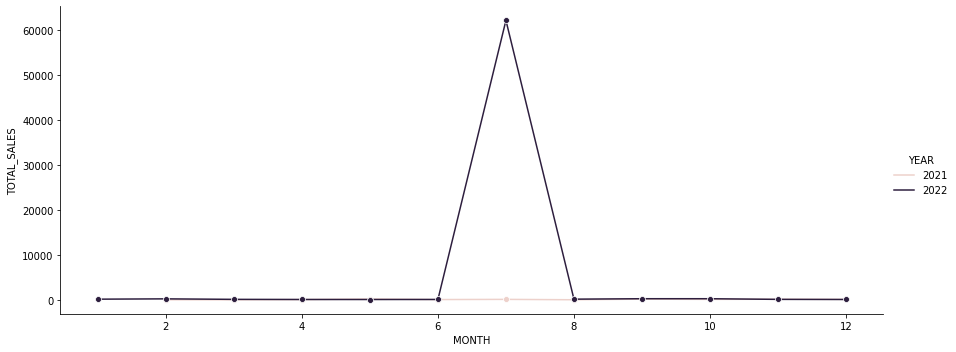

In [180]:
import seaborn as sns
sns.relplot(kind='line', data=sb_sales, x='MONTH', y='TOTAL_SALES', hue='YEAR', aspect=2.5, marker='o')

It can be observed from the time series line plot that the sales spiked during July 2022.

A possible reason for the increase in sales during July 2022 can be due to the 50% off on iced drinks that Starbucks introduced as mentioned in the web article below.

https://www.bestcoffeerecipes.com/starbucks-50-off-iced-drinks-tuesyays-july-2022/



**Insight:**
**Using sales transactions data, oraganizations can understand how well their marketing strategies work and can plan their offers accordingly.**